# Final projection exploration notebook

Dataset: https://www.kaggle.com/datasets/crawford/cat-dataset/data, Oct 9 2024, 11:05am

"super small projects"

In [5]:
import os
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

from tqdm import tqdm

from sklearn_col_compressor import compress_colours

from C4_preprocess_imgs import get_cropped_ROIs
from C4_helper import DataLoader, get_bbox, grabcut_algorithm, get_compressed_ROIs

all_data_dir = './cats/'
data_dir = './cats/CAT_00'
# img_ROIs_file = 'cat00_ROI_nps.npy'

img_ROIs_file = 'CAT_00_1xComp_ROIs.npy'
#'toy300range255_CAT_00_1xComp_ROIs.npy'  #use these
# '00_toy_smallsize_16cols.npy'

ImportError: cannot import name 'get_bbox' from 'C4_helper' (/Users/jsuchardt/ML2/ML2-final/C4_helper.py)

In [3]:
print(len(gold_rois))

505


# Object detection
Goal for object detection with bboxes  
Simplyfying assumption:  
No other animals than cats, 1 animal at a time  

1. Resize to half of average size in dir, to increase processing speed
2. Get bbox (if only 1 box, assume label cat), for 2+ labels, only keep if exactly one cat label is present
3. Remove background with grabCut
4. Compress colours using K-Means (k=64)


In [ ]:
if img_ROIs_file and os.path.isfile(img_ROIs_file):
    img_ROIs = np.load(img_ROIs_file)
else:
    data = DataLoader(data_dir)
    output = get_compressed_ROIs(data, verbose=True, toy=True)
    box_fail, multi_obj, col_fail, img_ROIs = output

    if img_ROIs_file:
        np.save(img_ROIs_file, img_ROIs)

print('Amount of image-ROIs from', data_dir, 'to work with:', len(img_ROIs)) #1h23h
# double comrpession, 2min30 before re-ordering in c4 hlper (box decides first) ->

Amount of image-ROIs from ./cats/CAT_00 to work with: 1585


refine to: face, body, paws, tail?

# Feature extraction/representation training

In [9]:
compressed_ROIs = [compress_colours(roi, 8) for roi in tqdm(img_ROIs)]
print('done')

100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


Compress colours
https://www.geeksforgeeks.org/image-compression-using-k-means-clustering/
Oct 22, 12:52

In [10]:
# img_arrays = np.array([np.array(Image.open(imgfile).resize(data.avg_size)
#                        ).transpose(2, 0, 1).reshape(3, -1)
#               for imgfile in data.imgs[:50]], dtype=np.float32)
# img_arrays.shape
# og_img = np.array(Image.open(data.imgs[5]), dtype=np.float32)

In [14]:
# CNN example 
#https://www.kaggle.com/code/itokianarafidinarivo/6000-store-items-images-classified-by-color


In [ ]:
# # read imgs in gold imgs, save to numpy
# gold_arrs = list()

# for root, dirs, files in os.walk('./cropped/imgs'):
#     for fname in sorted(files):
#         if fname.endswith('.jpg'):
#             with Image.open('./cropped/imgs/'+fname) as f:
#                 gold_arrs.append(np.array(f))

In [60]:
# len(gold_arrs)
# np.save(config['gold_img_ROIs_file'], gold_arrs)

In [2]:
plt.imshow(compress_colours(gold_rois[82], n_colours=32))

NameError: name 'kmeans' is not defined

In [18]:
print(np.sum(gold_rois[10], axis=2))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
set([arr.shape for arr in gold_rois])

{(275, 321, 3)}

In [337]:
import argparse
import json
from sklearn_col_compressor import compress_colours, train_col_compressor
import numpy as np
import matplotlib.pyplot as plt
from C4_preprocess_imgs import gold_rois_from_imgs

parser = argparse.ArgumentParser()

parser.add_argument('-c', '--config', help='configuration file',
                    default='config.json')
args, unk = parser.parse_known_args()
config = json.load(open(args.config))

gold_rois = gold_rois_from_imgs()
gen_rois = np.load('./cropped/devroisCAT00.npy')
print(len(gold_rois), len(gen_rois))


431 1079


In [351]:
longimgs = list()
step = int(len(gold_rois)**0.5+len(gold_rois)**0.1)
step = int(len(gold_rois)**0.5+len(gold_rois)**0.1)
bigimg= np.concatenate(
                            [np.concatenate(gold_rois[i-step:i], axis=0)
                                for i in range(step, len(gold_rois), step)]
                            
                            , axis=1)
    
# set([arr.shape for arr in longimgs])
#bigimg = np.concatenate(longimgs, axis=1)    
#bigimg = np.concatenate(gold_rois[10:14], axis=0)

In [352]:
bigimg.shape

(6050, 6099, 3)

In [4]:
kmeans_model = train_col_compressor(bigimg, modelfile='kmeans00.pickle')

Formatting data...
Fitting model...


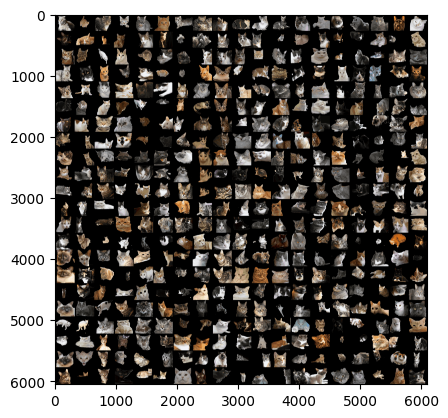

In [8]:
bigimg_comp = compress_colours(kmeans_model, bigimg)
plt.imshow(bigimg_comp/255)

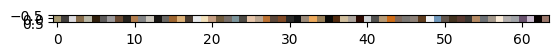

In [ ]:
gold_palette = np.array([np.uint8(col) for col in kmeans_model.cluster_centers_
                         if sum(np.uint8(col)>0)])

plt.imshow((gold_palette/255).reshape(1, 64, 3))

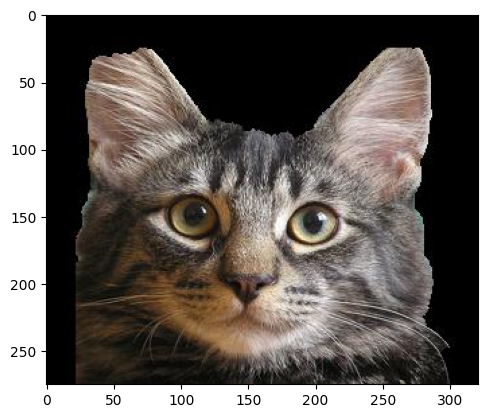

In [135]:
img = gold_rois[321]
plt.imshow(img)

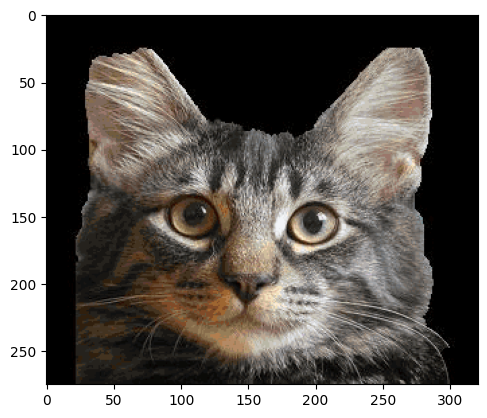

In [143]:
plt.imshow(compress_colours(kmeans_model, img)/255)

In [ ]:
from sklearn_col_compressor import get_colour_profile, plot_colour_profile


col_profile = get_colour_profile(kmeans_model, img)
print(sum(col_profile.values()))
len(col_profile), col_profile

1.0


(64,
 {(165, 152, 113): 0.0015142129534035378,
  (65, 62, 60): 0.020889255970816988,
  (221, 219, 222): 0.007657099593915617,
  (135, 108, 75): 0.012337394177162916,
  (186, 184, 167): 0.026412691857663984,
  (48, 31, 13): 0.02285085002408975,
  (94, 91, 90): 0.027789249088030835,
  (156, 153, 154): 0.019633147498107233,
  (104, 73, 50): 0.011425425012044875,
  (37, 34, 29): 0.06435405051965036,
  (178, 126, 79): 0.0011872806111914102,
  (132, 133, 134): 0.025930896827035584,
  (203, 198, 188): 0.04028150595361002,
  (24, 22, 19): 0.05643884644504095,
  (105, 103, 99): 0.034895725789799714,
  (158, 102, 49): 0.0030628398375662468,
  (220, 177, 121): 0.0,
  (72, 58, 46): 0.014471057884231538,
  (232, 233, 234): 0.0026842865992153624,
  (242, 225, 188): 0.003493013972055888,
  (198, 159, 132): 0.0008775552343588685,
  (113, 92, 61): 0.016621928556679745,
  (120, 111, 105): 0.02957877348750774,
  (125, 149, 155): 0.00025810448069378485,
  (77, 74, 68): 0.024192993323697433,
  (230, 197, 1

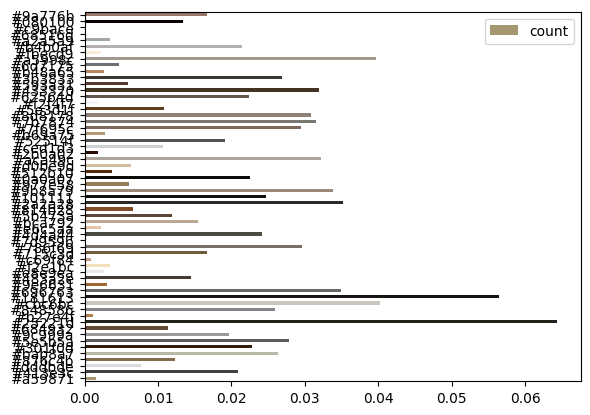

In [ ]:
plot_colour_profile(col_profile)


# vectorize embedding for clustering

In [ ]:
from cluster_cats import vectorize_colours
col_embedding = vectorize_colours(col_profile)
col_embedding

array([1.51421295e-03, 2.08892560e-02, 7.65709959e-03, 1.23373942e-02,
       2.64126919e-02, 2.28508500e-02, 2.77892491e-02, 1.96331475e-02,
       1.14254250e-02, 6.43540505e-02, 1.18728061e-03, 2.59308968e-02,
       4.02815060e-02, 5.64388464e-02, 3.48957258e-02, 3.06283984e-03,
       0.00000000e+00, 1.44710579e-02, 2.68428660e-03, 3.49301397e-03,
       8.77555234e-04, 1.66219286e-02, 2.95787735e-02, 2.58104481e-04,
       2.41929933e-02, 2.27131943e-03, 1.54174410e-02, 0.00000000e+00,
       1.19244270e-02, 6.55585381e-03, 3.51366233e-02, 2.46575814e-02,
       3.37772730e-02, 0.00000000e+00, 6.02243788e-03, 2.25755386e-02,
       3.75111845e-03, 6.29774933e-03, 3.21770253e-02, 1.82393833e-03,
       1.07027325e-02, 1.91169385e-02, 2.75311446e-03, 0.00000000e+00,
       2.95099456e-02, 3.15231606e-02, 3.08520889e-02, 1.07715603e-02,
       1.97880102e-03, 0.00000000e+00, 2.23690550e-02, 3.19877486e-02,
       5.93640306e-03, 2.68600730e-02, 2.59825177e-03, 4.66308762e-03,
      

https://www.geeksforgeeks.org/extract-dominant-colors-of-an-image-using-python/

# Unsupervised clustering

In [217]:
# load the gen image arrays
gen_rois = np.load('./cropped/devroisCAT00.npy')
gen_rois= gold_rois
# compress colours with the fitted method???


In [218]:
# raw_imgs = [np.array(Image.open(imgfile).resize((data.avg_size[0]//2,
#                                                  data.avg_size[1]//2)))
#             for imgfile in data.imgs[:300]]
# raw_imgs[0].shape, raw_imgs[0][0][:5]

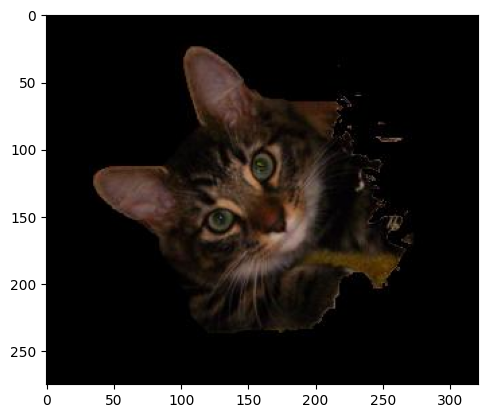

In [219]:
plt.imshow(gen_rois[1])

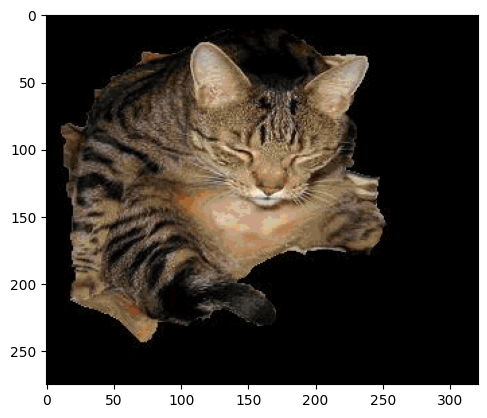

In [220]:
plt.imshow(compress_colours(kmeans_model, gen_rois[7])/255)

In [221]:
len(gen_rois[:500])

431

In [331]:
c_embeds = [vectorize_colours(get_colour_profile(kmeans_model, roi)) for roi in gen_rois[:100]]
len(c_embeds) #15s

100

### keep for commenting purposes, edited ver in cluster_cats.py

In [ ]:
# from sklearn.cluster import KMeans

# def get_ccluster(ROI_input, n=2, is_pal=False):
#     # oct 21, 16:32
#     #https://github.com/beleidy/unsupervised-image-clustering/blob/master/capstone.ipynb
#     # ROI_matrix = np.array([np.uint8(img_arr*255).flatten() for img_arr in ROI_list],
#     #                       dtype=np.float32)
#     # ROI_palettes = [np.array(list(set([tuple(a) for b in img_arr for a in b])))
#     #              for img_arr in ROI_list]

#             # ROI_palettes = [np.array(list([tuple(a) for b in img_arr for a in b]))
#             #             for img_arr in ROI_list]

#     if is_pal:
#         ROI_palettes = [np.array(list(set([tuple(a) for b in img_arr
#                                         for a in b])))
#                         for img_arr in img_ROIs]
#         ROI_list = [arr.reshape(1, 64, 3) for arr in ROI_palettes
#                         if arr.shape==(64, 3)]
#     else:
#         ROI_list=ROI_input

#     # ROI_feats = list()
#     # for img in ROI_list:
#     # # print(img.shape)
#     #     r_vals, g_vals, b_vals = list(), list(), list()
#     #     for a in img:
#     #         for col in a:
#     #             if col.any():
#     #                 r_vals.append(col[0])
#     #                 g_vals.append(col[1])
#     #                 b_vals.append(col[2])
#     #     img_feats = np.array([max(r_vals), min(r_vals), sum(r_vals)/len(r_vals),
#     #                     max(g_vals), min(g_vals), sum(g_vals)/len(g_vals),
#     #                     max(b_vals), min(b_vals), sum(b_vals)/len(b_vals)])
            
#     #     #print(img_feats.shape)
#     #     ROI_feats.append(img_feats)
#     # else:
#     #     ROI_palettes = [np.array(list(set([tuple(a) for b in img_arr for a in b])))
#     #              for img_arr in ROI_list]

#     #     for img in ROI_palettes:
#     #         #print(img.shape)

#     #         r_vals, g_vals, b_vals = list(), list(), list()

#     #         for col in img:
#     #             if col.any():
#     #                 r_vals.append(col[0])
#     #                 g_vals.append(col[1])
#     #                 b_vals.append(col[2])

            
#         #  print(len(img))
#         # print(max(r_vals), min(r_vals), sum(r_vals)/64, sum(r_vals)/len(r_vals))
#         # print(max(g_vals), min(g_vals), sum(g_vals)/64, sum(g_vals)/len(g_vals))
#         # print(max(b_vals), min(b_vals), sum(b_vals)/64, sum(b_vals)/len(b_vals))
#         # img_feats = np.array([max(r_vals), min(r_vals), sum(r_vals)/len(r_vals),
#         #                     max(g_vals), min(g_vals), sum(g_vals)/len(g_vals),
#         #                     max(b_vals), min(b_vals), sum(b_vals)/len(b_vals)])
                
#         #     #print(img_feats.shape)
#         # ROI_feats.append(img_feats)

#     #ROI_feats = np.array([arr.flatten() for arr in ROI_list])

#     # # normalise values
#     # ROI_mat /= 255
#     # #flat_ROIs = KMeans.fit_transform(flat_ROIs) ??

#     kmeans = KMeans(n_clusters=n, init='k-means++', random_state=0)
#     Y = kmeans.fit_predict(ROI_input) #2mins for n=5, 50sec for n=2

#     # clusters_dict = {cluster_id : list() for cluster_id in set(Y)}
#     # for i, cluster_id in enumerate(Y):
#     #     clusters_dict[cluster_id].append(ROI_input[i])

#     return Y

In [ ]:
from cluster_cats import get_ccluster, vis_cluster

Y = get_ccluster(c_embeds, n=4)
[('cluster nr: '+ str(id), 'items in cluster: '+ str(list(Y).count(id))) for id in set(Y)]


[('cluster nr: 0', 'items in cluster: 33'),
 ('cluster nr: 1', 'items in cluster: 30'),
 ('cluster nr: 2', 'items in cluster: 29'),
 ('cluster nr: 3', 'items in cluster: 8')]

In [ ]:
# sort rois based on cluster nr
#clustered_imgs = {{'cluster_id': id, 'img': gen_rois[i]} for i, id in enumerate(Y)}
# include this somewhere else? problem: needs og igms
clustered_imgs =  {id: [] for id in set(Y)}
for i, id in enumerate(Y):
    clustered_imgs[id].append(gen_rois[i])
len(clustered_imgs[0])

33

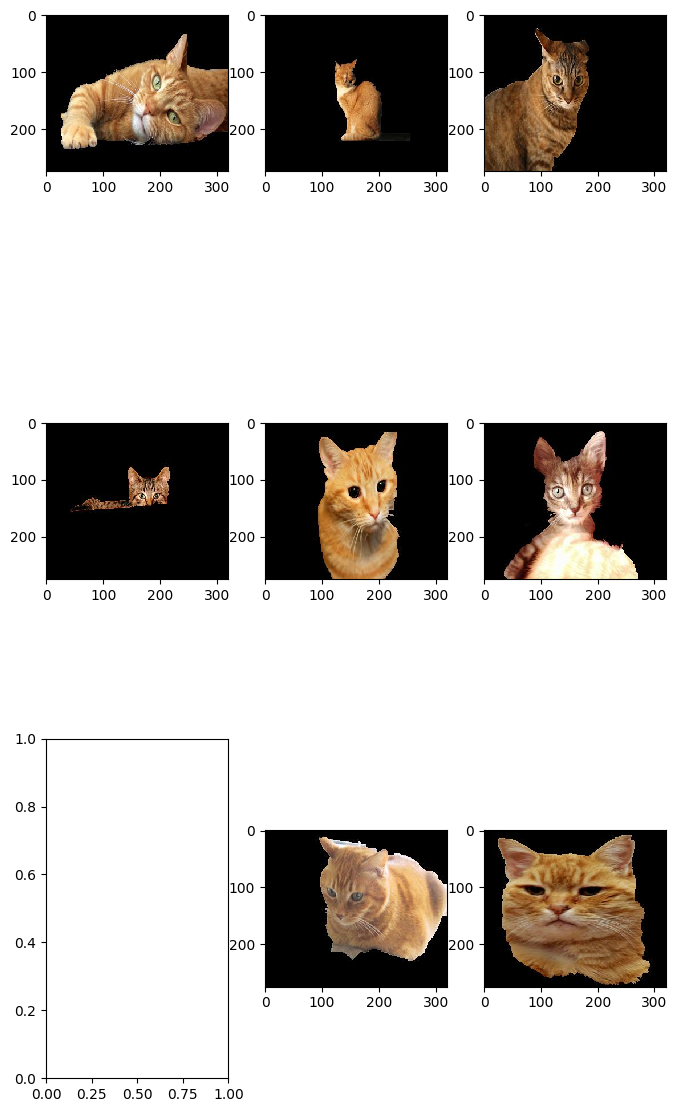

In [336]:
vis_cluster(clustered_imgs[3])

In [22]:
# ?? use ggplot in r 
# on clustering https://www.geeksforgeeks.org/clustering-in-machine-learning/

# project https://www.trpkovski.com/2023/10/23/grouping-images-by-colours-exploring-colour-based-image-clustering

In [23]:
# features: max pooling for darkest & lightest areas, also mean colour
# normalise with cnn first to reduce noise, also adjust for lighting
# later adapt if u use different region?

In [24]:
# code example?
# https://github.com/beleidy/unsupervised-image-clustering/blob/master/capstone.ipynb
